# Import libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score, accuracy_score

## Loading dataset:

In [4]:
df = pd.read_excel('marketing_campaign (1).xlsx')

## 1st five data:

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## Shape of data:

In [8]:
df.shape

(2240, 29)

**Dataset having `2240` customer data and `29` columns**

## Columns:

In [11]:
print('\033[1mColumn names :\033[0m', df.columns)
print('\n\033[1mLength of columns :\033[0m', len(df.columns))

Column names : Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Length of columns : 29


# Data types:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

**Observations :** we have `26` numerical column, `2` categorical column and `1` datetime column.

# Missing values:

In [16]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Obsevation :** `Income` column having 24 null or missing values. Because there can be students as well.

**Conclusion :** Filling null value with most frequently income.

## Filling null values:

In [19]:
df['Income'].fillna(df['Income'].mode()[0], inplace=True)

C:\Users\mpapu\AppData\Local\Temp\ipykernel_4356\3931071632.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].mode()[0], inplace=True)


In [20]:
##Verifying all null values handdled:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Duplicates:

In [22]:
print('Duplicate values :', df.duplicated().sum())

Duplicate values : 0


**Obsevation :** There is no duplicate values.

**Conclusion :** No additional cleaning steps are required.

# Removing unwanted columns:

In [25]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [26]:
df.drop(columns=['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], inplace=True)

# Some statistical info:

In [28]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,51767.816518,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25458.285477,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,34722.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51075.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Convert year_birth column into age:

In [30]:
# Let the current year would be 1996
current_year = 1996

# Calculate age
df['Year_Birth'] = current_year - df['Year_Birth']

# Rename column
df.rename(columns={'Year_Birth': 'Age'}, inplace=True)

In [31]:
df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,39,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,42,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,31,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,12,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,15,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0


# Adding a column that having age group based on there age:

In [33]:
print('Younger age :', df['Age'].min())
print('Older age :', df['Age'].max())

Younger age : 0
Older age : 103


In [34]:
# Define function to categorize age groups
def age_group(age):
    if age <= 12:
        return 'Child'
    elif 13 <= age <= 24:
        return 'Young'
    elif 25 <= age <= 59:
        return 'Adult'
    else:
        return 'Old'

# Apply function to create age_group column
df['Age_group'] = df['Age'].apply(age_group)

print(df.head())

   Age   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0   39  Graduation         Single  58138.0        0         0       58   
1   42  Graduation         Single  46344.0        1         1       38   
2   31  Graduation       Together  71613.0        0         0       26   
3   12  Graduation       Together  26646.0        1         0       26   
4   15         PhD        Married  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  NumStorePurchases  \
0       635         88              546  ...                  4   
1        11          1                6  ...                  2   
2       426         49              127  ...                 10   
3        11          4               20  ...                  4   
4       173         43              118  ...                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0          

# Separating categorical and numerical columns:

In [36]:
## Categorical columns:
cat_col = [i for i in df.columns if df[i].dtype == 'object']
print(cat_col)

['Education', 'Marital_Status', 'Age_group']


In [37]:
## Numerical columns:
num_col = [i for i in df.columns if df[i].dtype != 'object']
print(num_col)

['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']


# Outliers detection :

**Visualize outliers using boxplot :**

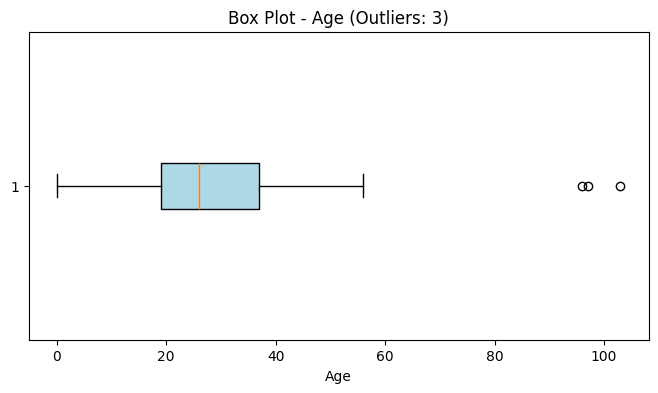

Column 'Age' Outliers: [ 96 103  97]


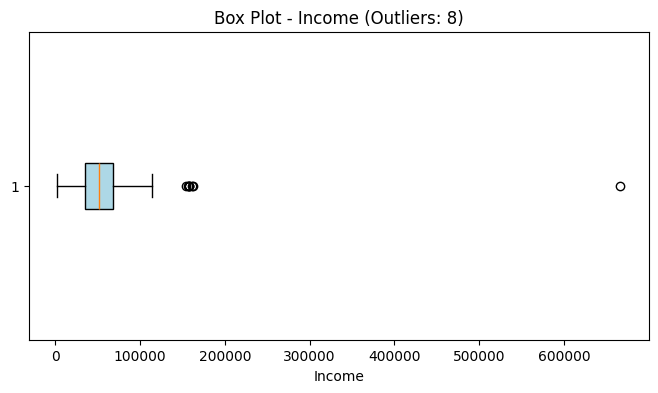

Column 'Income' Outliers: [157243. 162397. 153924. 160803. 157733. 157146. 156924. 666666.]


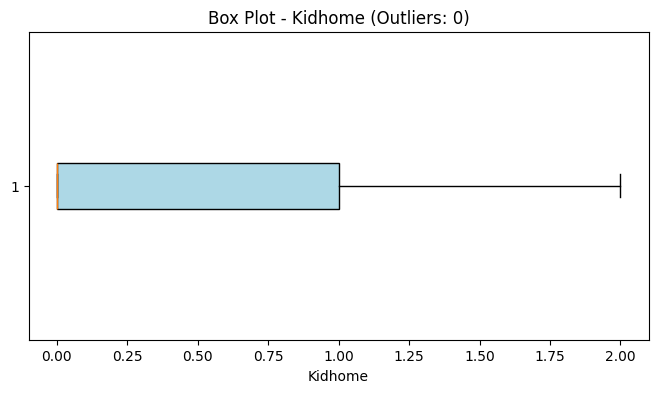

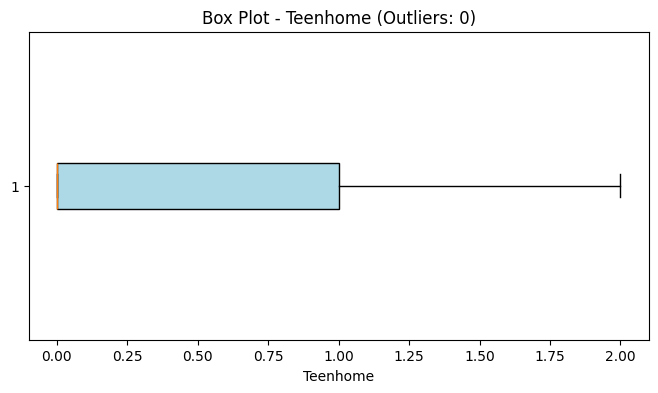

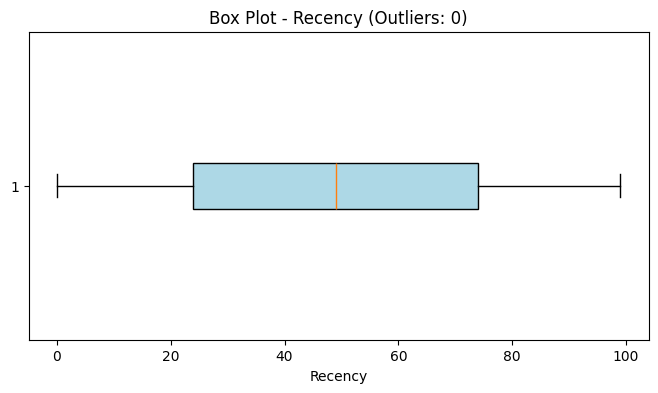

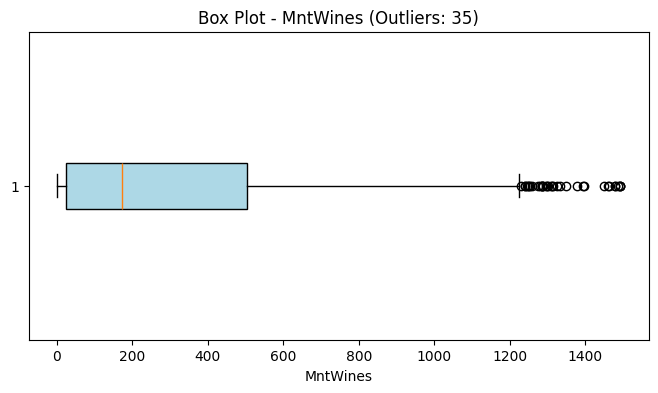

Column 'MntWines' Outliers: [1332 1349 1241 1285 1248 1239 1396 1288 1379 1478 1492 1492 1279 1308
 1478 1253 1394 1296 1285 1230 1315 1298 1302 1449 1259 1252 1459 1493
 1324 1285 1462 1276 1245 1486 1311]


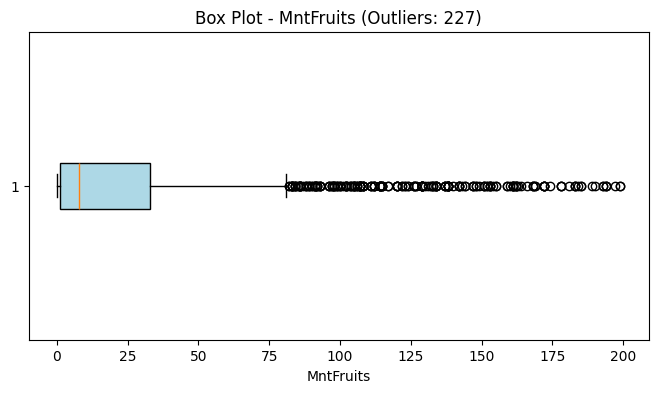

Column 'MntFruits' Outliers: [ 88 100 164 120 107 111 105 172 106 194 115  99  90 133 106 162 189 138
  86 114 153 134 148  84 162 129  98 183 129 147 138 153 144 104  91 163
 134 152 105 114 137 190  96  84 162 138  83  92 134 155 151  85 129 153
 129 183 127  91 107 129 103  89 105 181 112 159 134 102  86 123 166 142
 133 178  93 107  97 115 168  91 148 174 122 123  91 199 102 138 101  92
  99 111 152  86  98  85 107 137 138 168  93 114  98 172  96 114  83 117
 114 178 108 130 161 138 124 126 105  83 120 142 104 100  83 106 161 185
 147 112 162  86 108 161 129  93  93 172  87 168 151 102  84 199  97 127
  89 172 161 104 197 137 111  98 194  82 184  88  99 120 160 107 108 185
 115  96 133 112 140 107 107 102 117 131  91 126 129 147  97 132  86 120
 108 138 115 169  84  92 169 142 172 114 107 100 134 153  86 183 138 193
 137 108  83 193 105 149 151 143 122 112  82  90 154  89 161 159  88 178
  83 120 126 102 132 144 155 142 124 129 194]


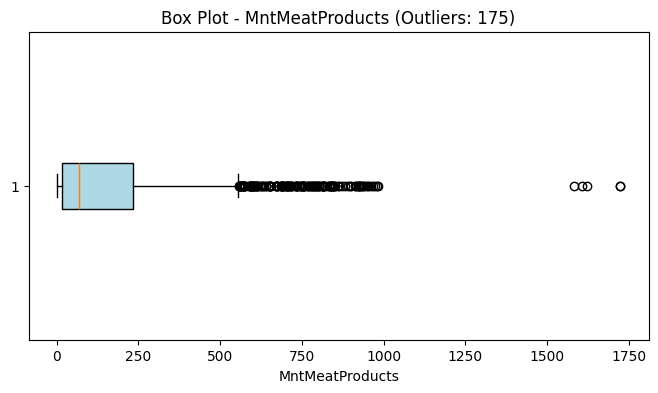

Column 'MntMeatProducts' Outliers: [1725  801  780  925  779  568  690  812  951  590  921  756 1582  813
  740  757  768  565  573  561  570  562  832  785  818  815  786  591
  716  792  974  594  613  670  925  761  940  797  635  592  572  732
  713  653  758  711  838 1622  559  597  706  617  742  689  898  706
  597  747  804  774  929  845  569  838  685  873  674  890  704  606
  790  925  651  708  640  733  961  568  780  678  842  843  711  818
  864  750  731  604  915  689  801  913  946  672  611  687  842  622
  790  717  573  984  694  595  672  573  601  731  717  687  815  706
  724  827  560  701  915  639  573  625  649  832  575  599 1725  768
  673  850  835  936  935  853  558  751  693  629  981  586  565  697
  736  602  590  899  816  603  754  835  768  612  753  654  567  653
  951  815  797  592  746  932  735  650  607  968  883  849  614  818
  689  749  655  845  860  631 1607]


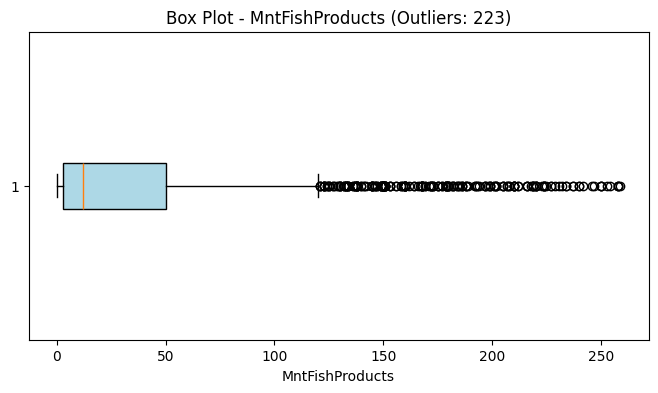

Column 'MntFishProducts' Outliers: [172 225 150 160 227 156 180 121 201 189 137 185 151 123 173 149 134 173
 140 147 224 254 180 186 218 133 150 220 205 162 188 150 150 166 216 219
 151 172 212 129 151 137 156 179 179 149 197 220 199 205 169 240 146 224
 127 136 168 132 147 231 168 202 125 175 179 133 121 172 164 177 138 138
 175 247 127 150 227 159 153 123 134 202 234 210 133 168 160 160 194 250
 138 146 220 237 250 145 167 160 150 168 192 180 137 130 232 132 125 168
 132 145 184 134 240 186 125 219 237 123 138 158 216 259 168 219 186 151
 145 133 137 207 160 210 172 182 141 182 124 171 193 160 130 242 175 180
 246 188 210 234 197 210 197 219 149 149 185 142 140 253 169 220 258 134
 123 146 258 179 207 198 153 141 168 138 223 151 258 188 145 224 150 216
 160 124 159 150 181 150 177 138 184 158 129 130 151 205 173 128 123 153
 145 179 208 180 208 201 210 121 164 212 250 136 199 229 133 150 192 193
 224 130 199 145 202 182 149]


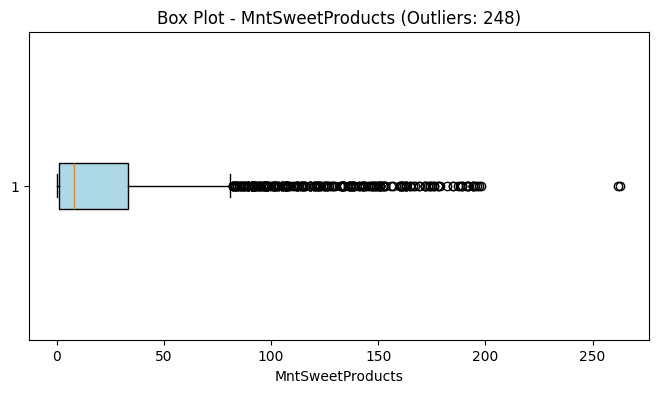

Column 'MntSweetProducts' Outliers: [ 88 112 263 178 167 120 120 122  82 105 133 132  98  82 103  89  91  89
 113 173  87 176 102  87 138 163 124 172  84 149  92 130 114 141 147  97
 118 153 189 107 128 163 133 134  91 150 137  91 103 172  95 156 194  96
 191  84 192 129 108 107 123 185 134 121 163 127 125 121 198 115  82  98
 106 101 110 134 102  83 107 160 138 122 166 136 106  98 116 133 120 182
  91 148 161 161 157 153 123 133 143 102  92 169 103 149  91  86 146 123
 137  92  87  91 178 152 112 115 133 152 116 138  92  83  95 161  93 160
 115 112 137 172 151  99 144 151 122 147 115 195  91 189 161  98 175 145
 162 105  96 187 126  97 108 143 147 105 160 114 194 148  85  98  89 109
 151 152 137 137 197 125 176 165  97 121 144 174 151 112 118  96 112  82
 163 196 107 102  83 107  97  88  95 174 107 118 118  92 126 107  97  89
 150  86 169 138 139 188 142 107  88 105  94 165 143  83 138  95 262  92
 185 108  84  91 141  85 179  86  94 143 100 101  93 194 129 101 102  98
 151  89 126 19

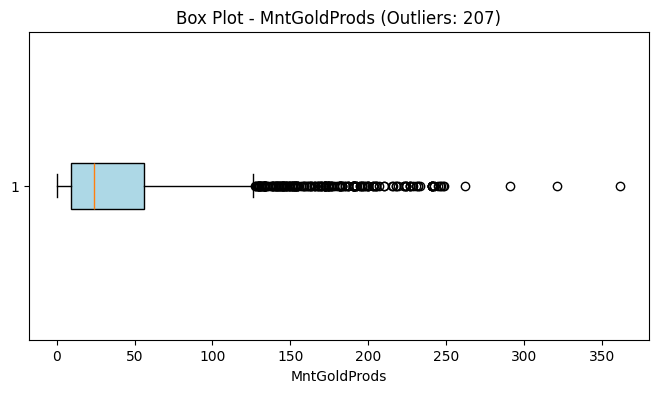

Column 'MntGoldProds' Outliers: [176 362 174 241 190 169 145 223 168 172 216 130 223 141 172 192 182 181
 152 172 148 241 146 162 131 182 135 203 139 224 173 218 142 233 157 159
 172 191 241 134 130 153 175 224 165 190 163 159 144 147 207 146 151 141
 154 242 191 147 174 155 249 151 183 170 191 151 152 227 205 134 198 139
 177 133 145 141 187 171 130 205 170 142 129 175 242 135 241 174 182 166
 227 144 172 133 139 131 195 231 182 182 191 158 145 218 200 187 178 200
 147 149 190 133 142 168 153 134 131 154 192 132 210 241 144 210 172 154
 138 134 176 205 262 168 140 131 246 138 130 196 191 144 153 170 197 196
 200 133 199 215 127 134 161 180 187 195 191 141 149 128 183 291 150 153
 162 232 166 192 176 183 219 203 172 153 133 174 137 185 224 145 160 321
 143 204 143 232 145 149 133 196 130 147 245 185 154 229 163 128 153 150
 241 129 248 129 227 163 174 152 247]


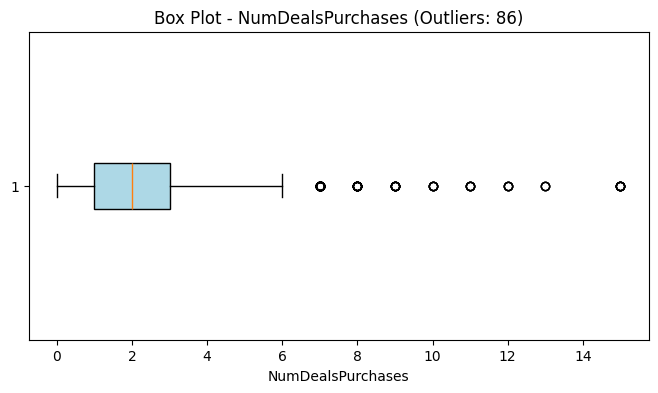

Column 'NumDealsPurchases' Outliers: [15  7  9  7  7 12  7 15  8 10  9  7 13  7  7  9  9 15  7  7  7  7  7  7
  7 15  7  8  7  8  7  7  7  8  8  7  7  7  7 15 11  8  7  7 12 10 12 15
 10  8  7 11  8  7  7  7 10  7  7 13  9 12  7 11  7  7  9  8  9 13  9  8
 11 15 11  8  7  8 10  8  7  7  7  7  8  7]


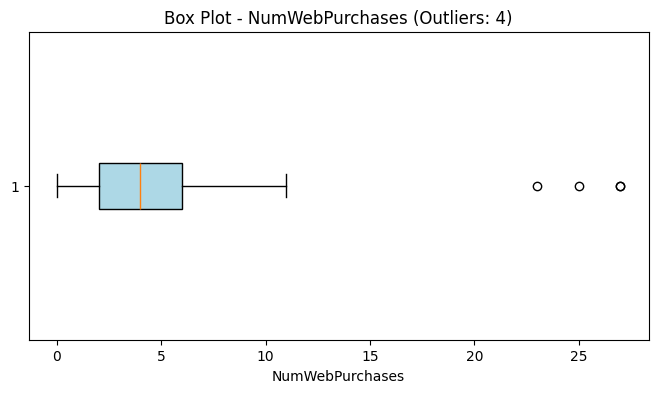

Column 'NumWebPurchases' Outliers: [27 23 27 25]


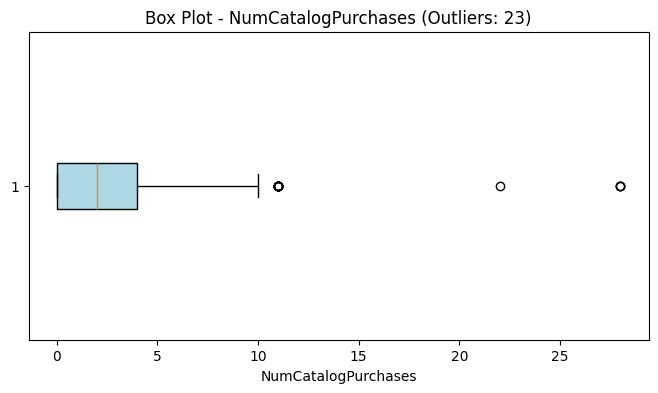

Column 'NumCatalogPurchases' Outliers: [28 11 22 11 11 11 11 11 28 11 11 11 11 11 11 11 11 28 11 11 11 11 11]


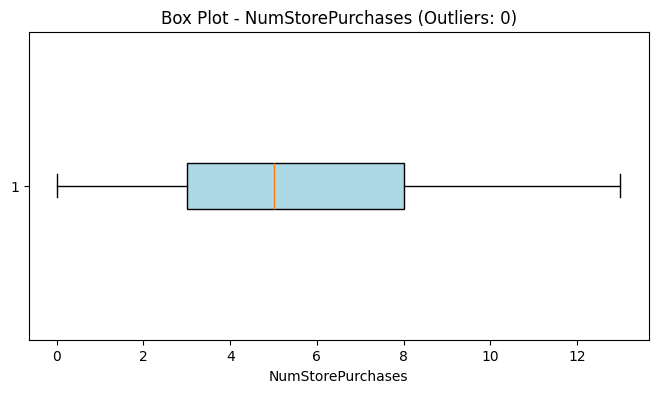

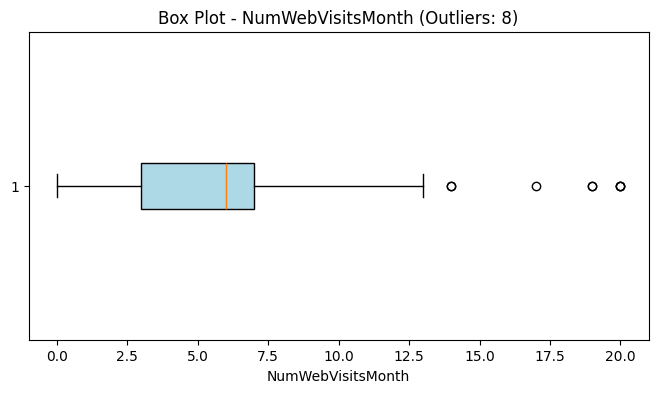

Column 'NumWebVisitsMonth' Outliers: [20 20 14 19 20 17 14 19]


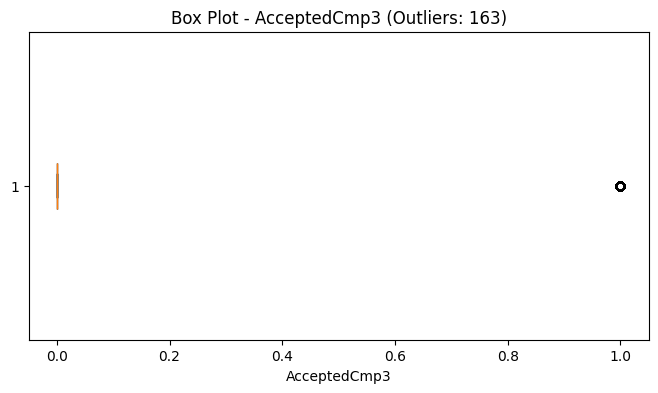

Column 'AcceptedCmp3' Outliers: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


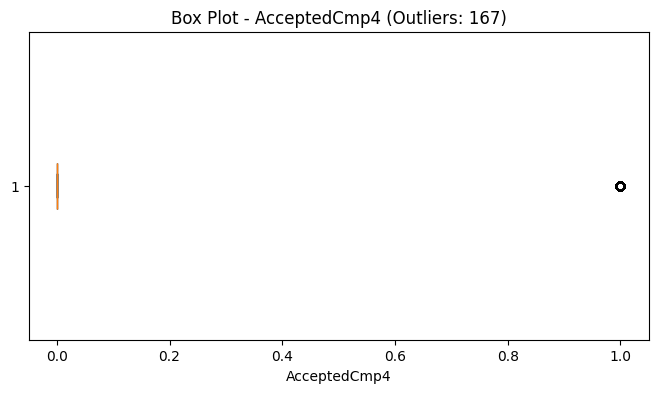

Column 'AcceptedCmp4' Outliers: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


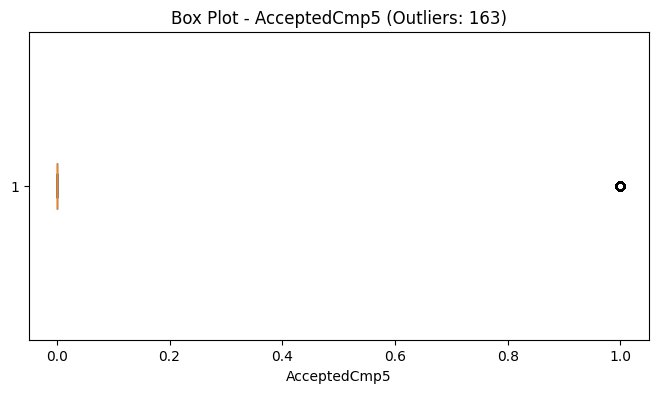

Column 'AcceptedCmp5' Outliers: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


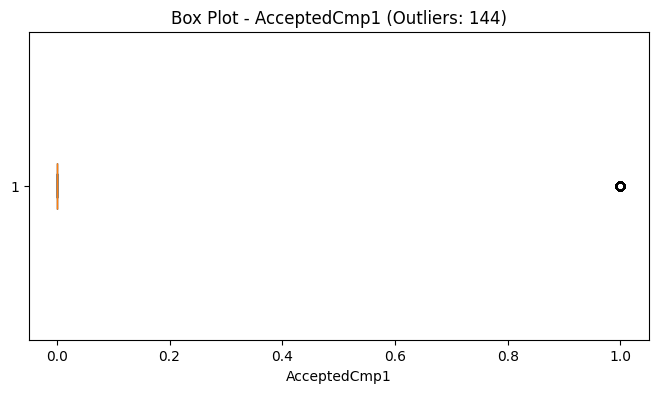

Column 'AcceptedCmp1' Outliers: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


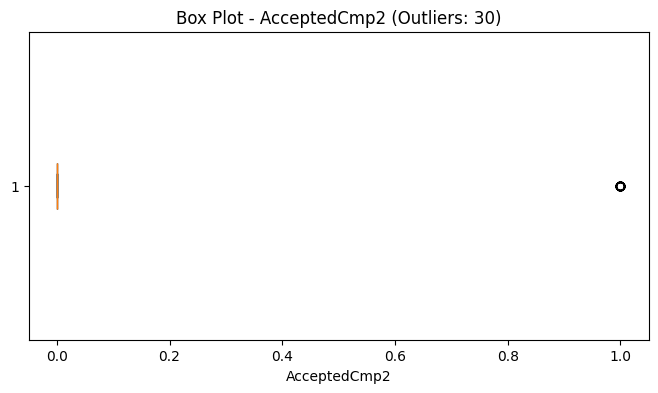

Column 'AcceptedCmp2' Outliers: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


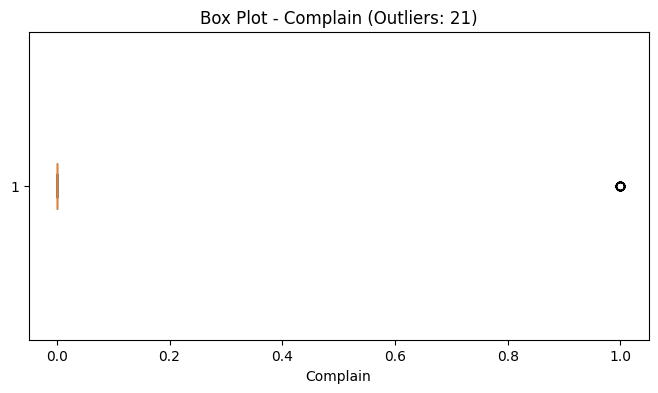

Column 'Complain' Outliers: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


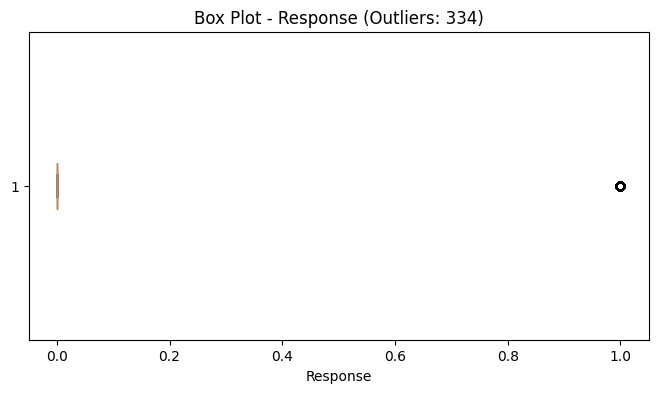

Column 'Response' Outliers: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


In [40]:
# Box plot with adjusted axis for tightly clustered data
for column in num_col:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[column], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    
    # Calculate outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Display outlier values in the title
    plt.title(f'Box Plot - {column} (Outliers: {len(outliers)})', fontsize=12)
    plt.xlabel(column)
    plt.show()

    # Print the actual outlier values
    if len(outliers) > 0:
        print(f"Column '{column}' Outliers: {outliers[column].values}")


**Observations from Outlier Analysis:**
  - Number of columns Outlier identified : 19

**Conclusion :**
  - No need to handle all Outliers because the dataset has some columns that has 0 and 1 unique values.(`shown in following cell`)
  - It detect 1 as outlier.
  - its ok to leave as it is for the column having 3 to 10 outliers.(i.e :-'Year_Birth', 'Income', 'NumWebPurchases', 'NumWebVisitsMonth')
  - Handlling Rest 8 columns. (i.e :- 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases')

---

In [42]:
df['AcceptedCmp5'].unique()

array([0, 1])

In [43]:
##Coping the dataset for the future coparision:
df1 = df.copy()

**Handle Outliers :**

In [45]:
## Columns to handle outliers:
out_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases']

In [46]:
len(out_columns)

8

In [47]:
# creating a function for capping outliers based on IQR:
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap the values instead of removing rows
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

# Apply capping to all numerical columns:
for col in out_columns:
    cap_outliers(df, col)
print("\033[1mCapping applied to columns.\033[0m")

Capping applied to columns.


**Outlier Handling Technique**
- **Technique Used**: **Capping (IQR Method)**  
   - **Why**:    
     - Capping allows us to limit the effect of these extreme values without eliminating the rows, preserving the dataset size while normalizing the influence of outliers.
     - By completely removing outliers may lead to the loss of critical information.
     - The IQR method is appropriate because it adjusts for variability while retaining the core distribution of the data.

In [49]:
## Verifying outliers handdled or not:
for column in out_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    remaining_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(remaining_outliers)} remaining outliers")

MntWines: 0 remaining outliers
MntFruits: 0 remaining outliers
MntMeatProducts: 0 remaining outliers
MntFishProducts: 0 remaining outliers
MntSweetProducts: 0 remaining outliers
MntGoldProds: 0 remaining outliers
NumDealsPurchases: 0 remaining outliers
NumCatalogPurchases: 0 remaining outliers


In [50]:
# Display total number of rows before and after outlier handling:
before_outliers = len(df1)
after_outliers = len(df)

print(f"\033[1mTotal number of rows before outlier handling:\033[0m {before_outliers}")
print(f"\033[1mTotal number of rows after outlier handling:\033[0m {after_outliers}")
print(f"\033[1mTotal rows removed:\033[0m {before_outliers - after_outliers}")

Total number of rows before outlier handling: 2240
Total number of rows after outlier handling: 2240
Total rows removed: 0


# Visualizations for Additional Insights :

**Histogram:**

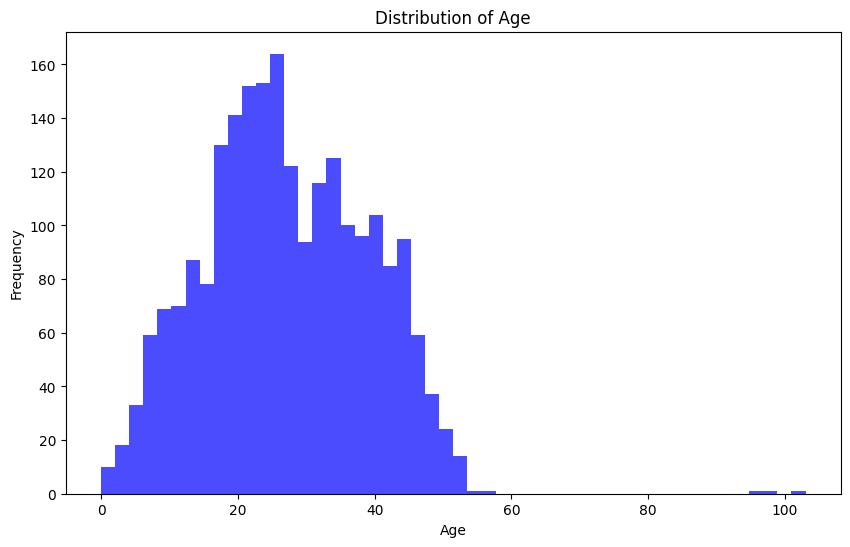

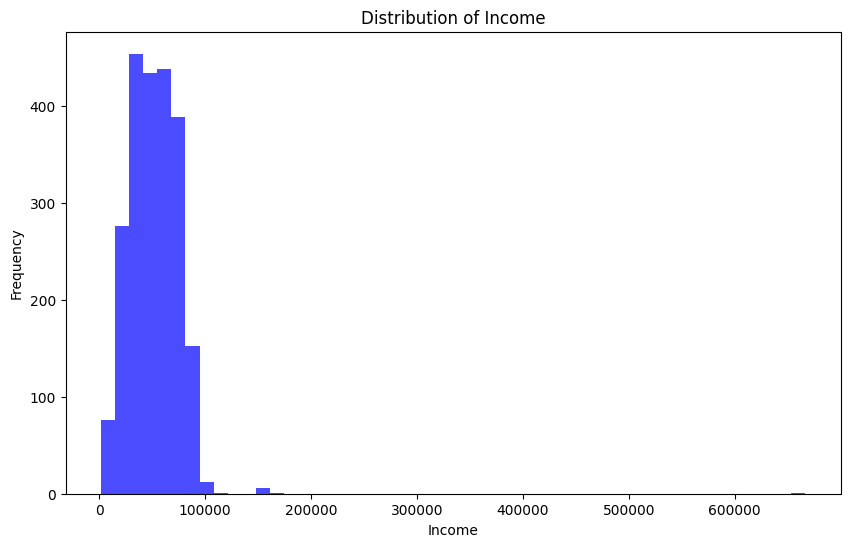

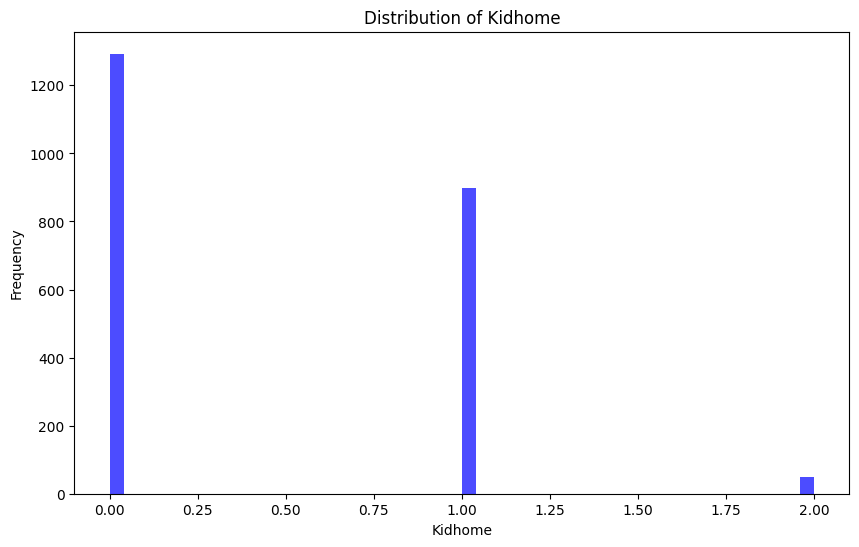

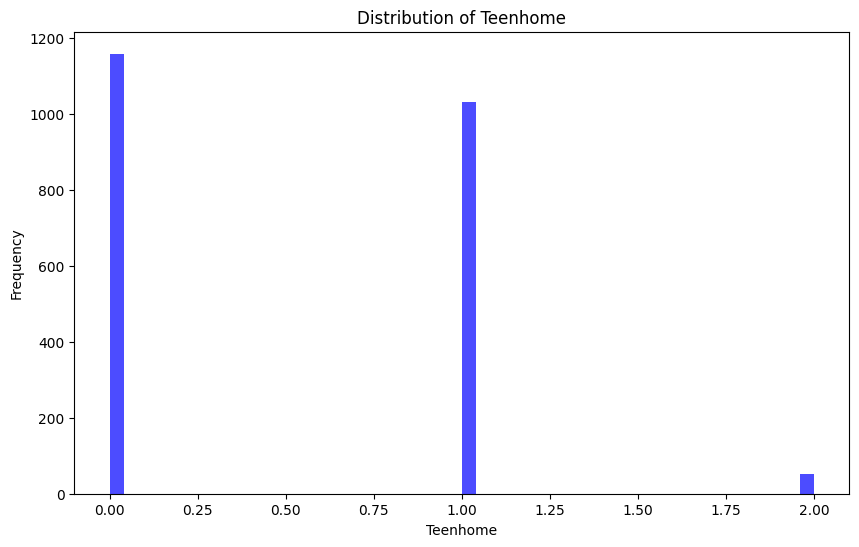

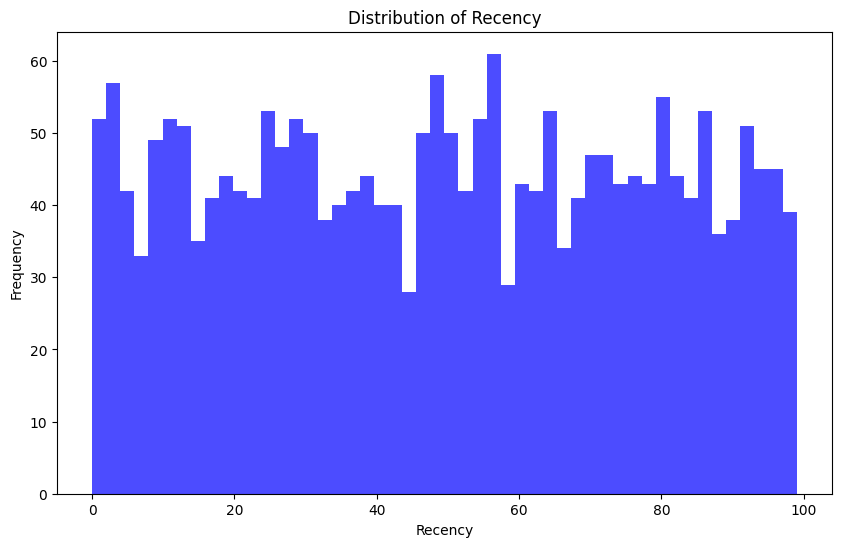

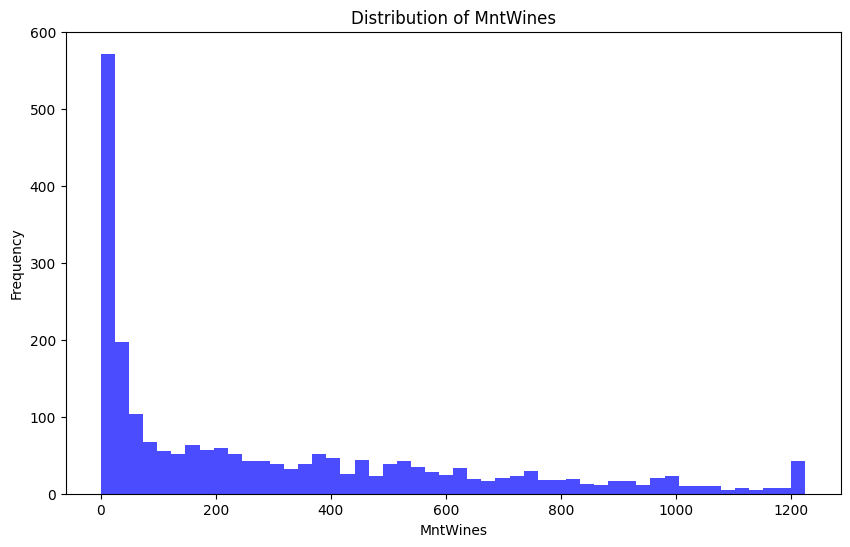

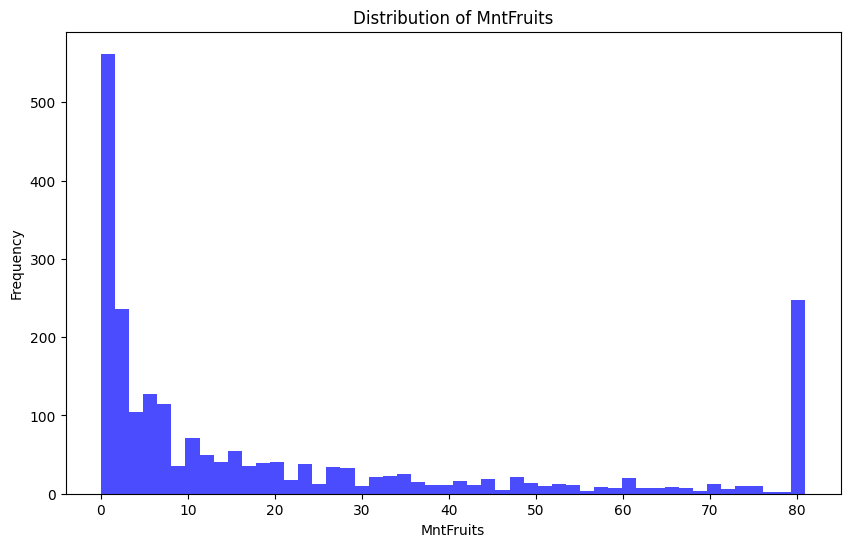

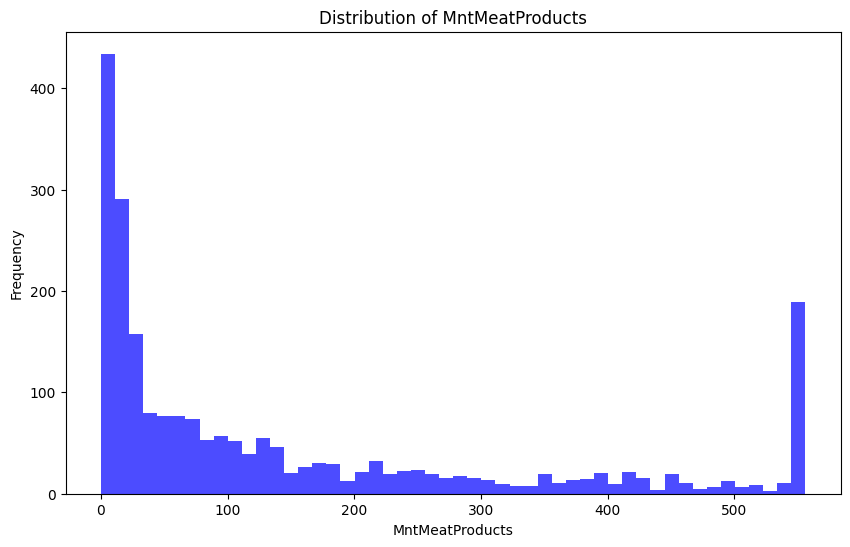

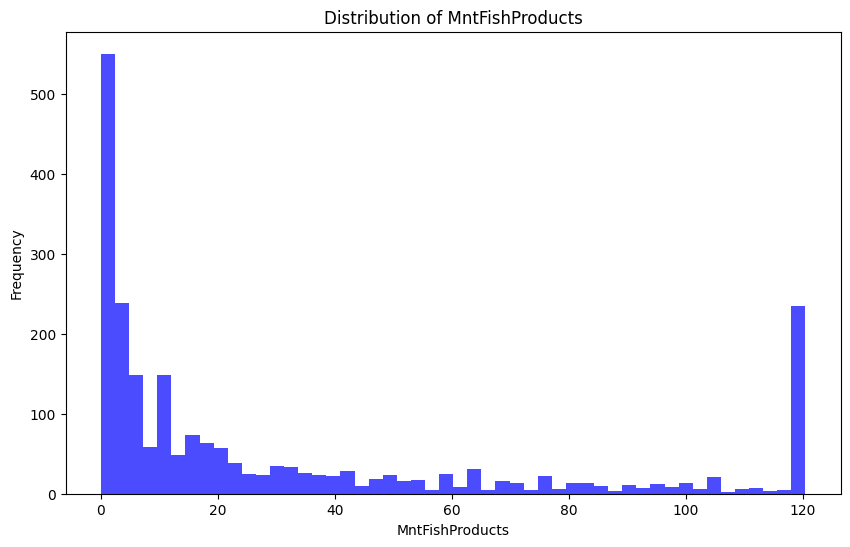

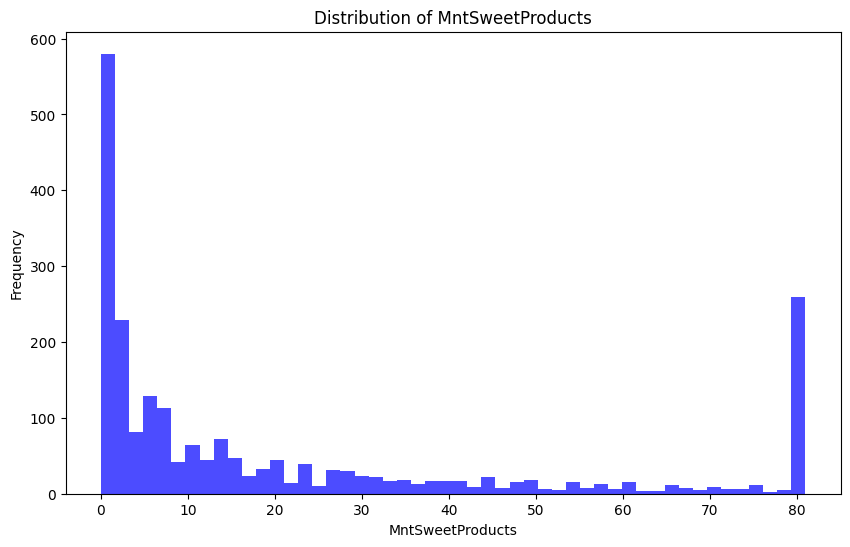

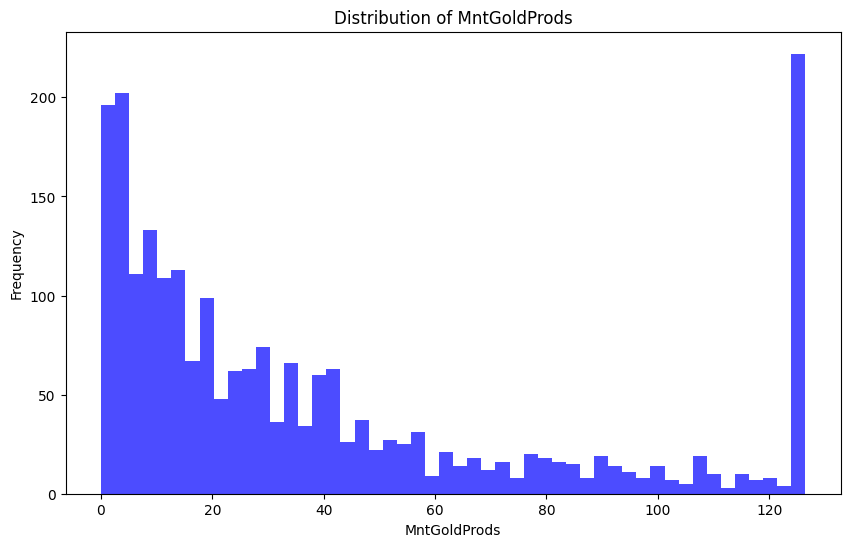

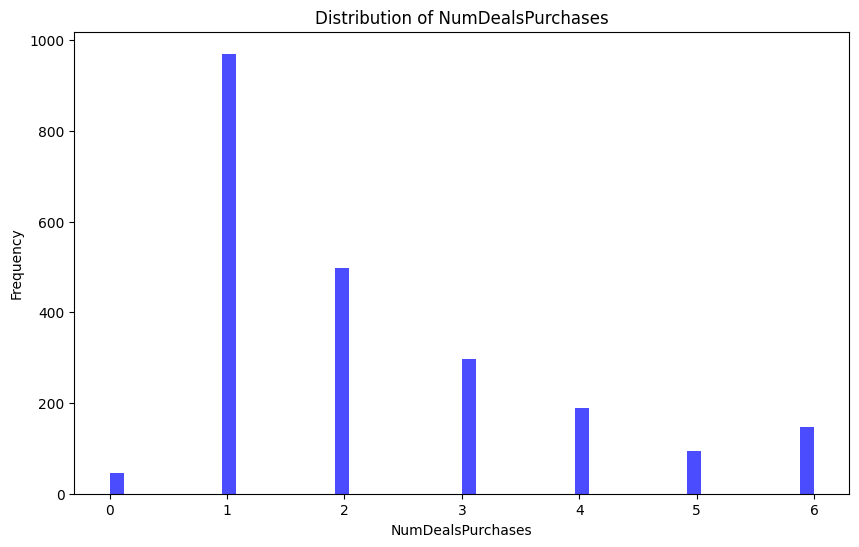

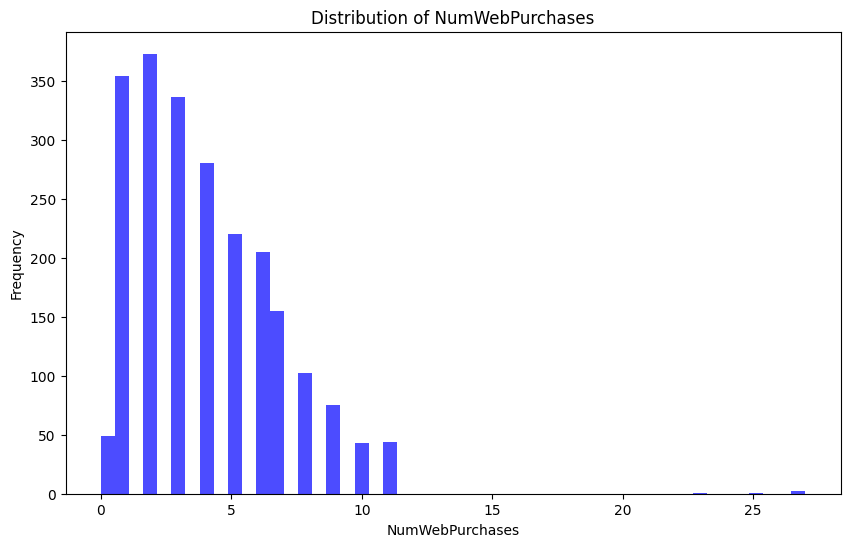

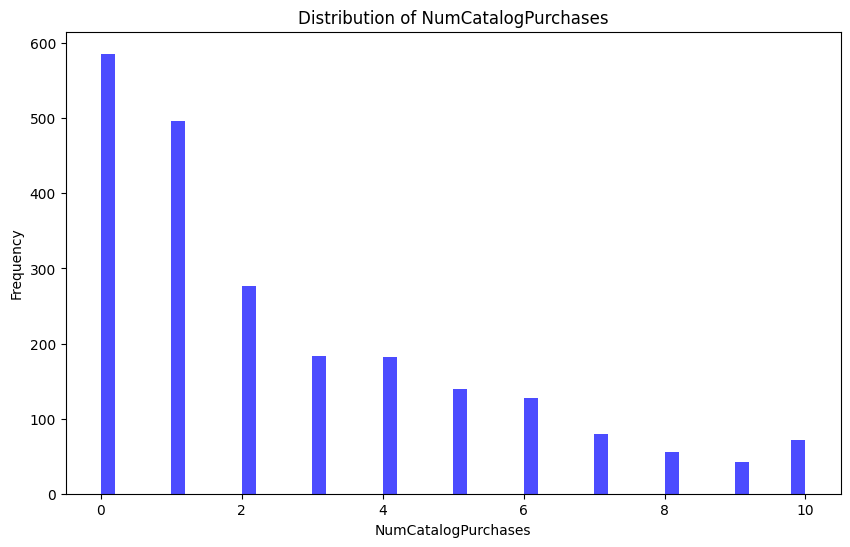

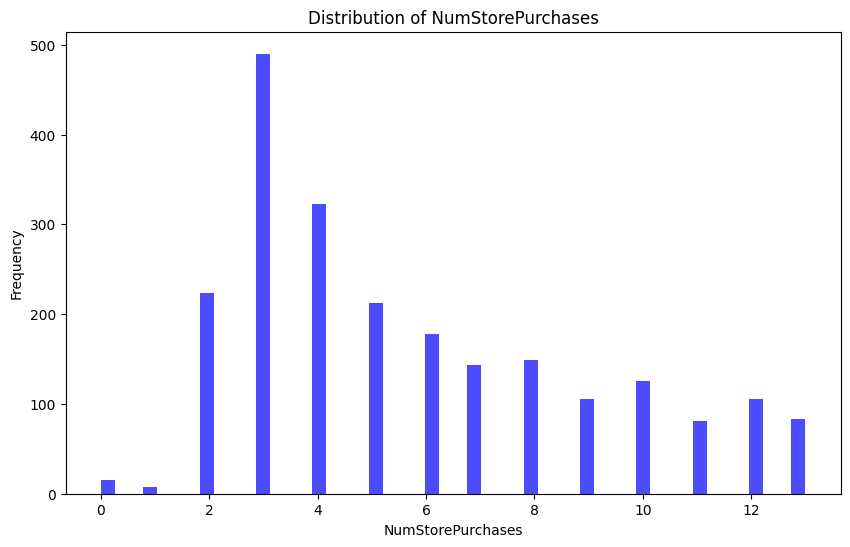

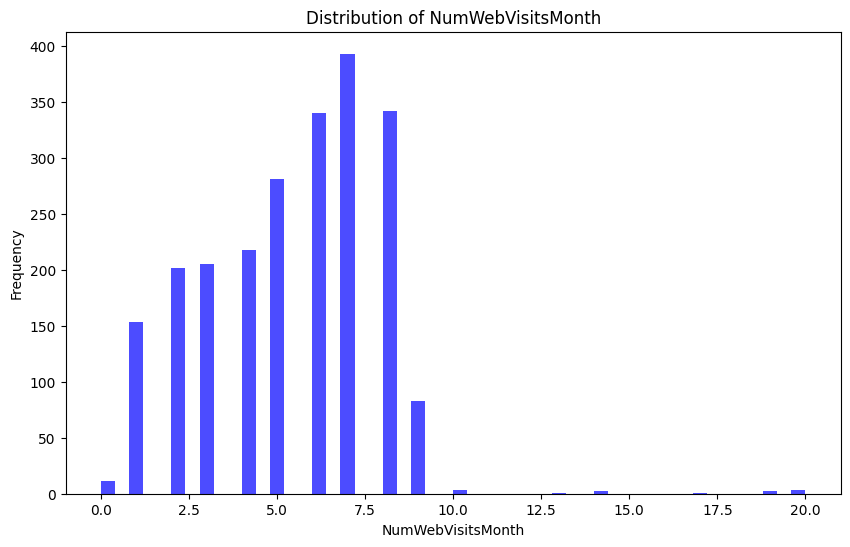

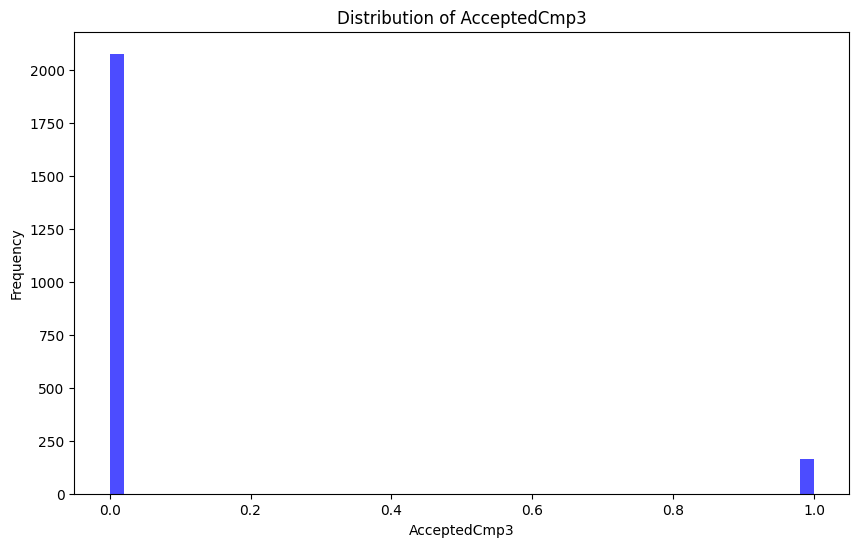

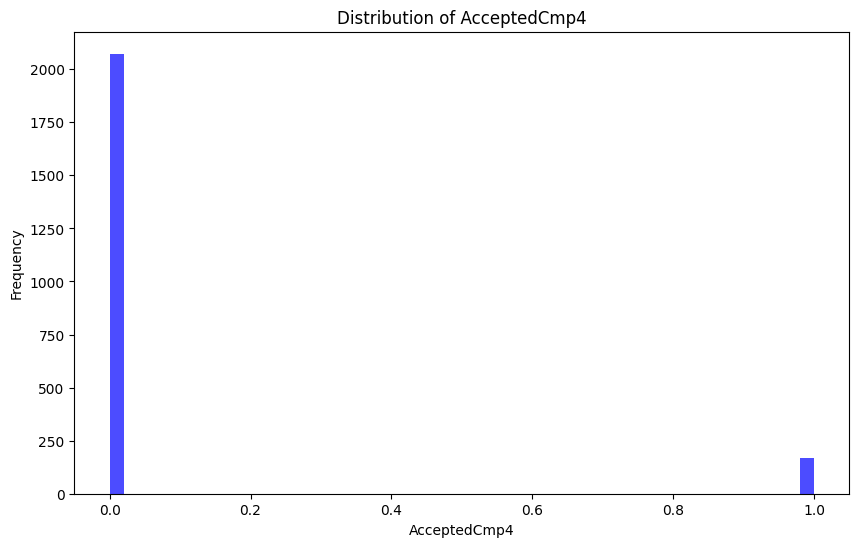

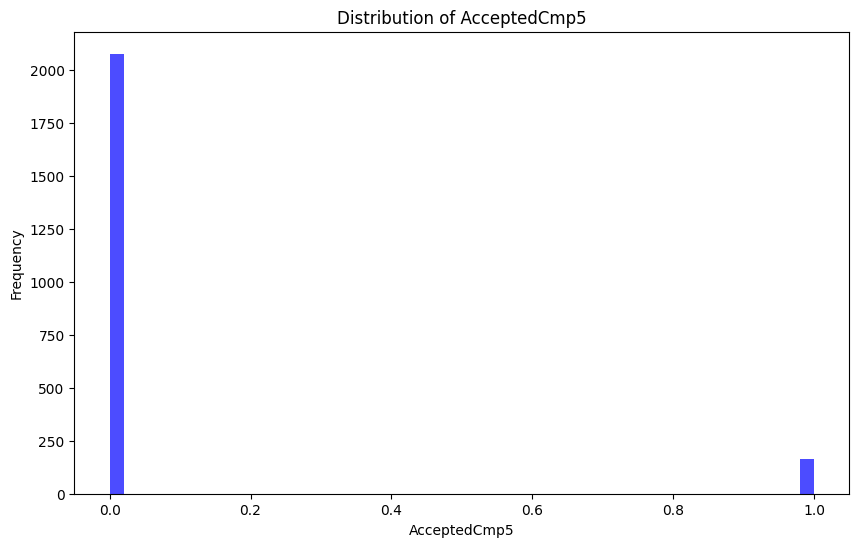

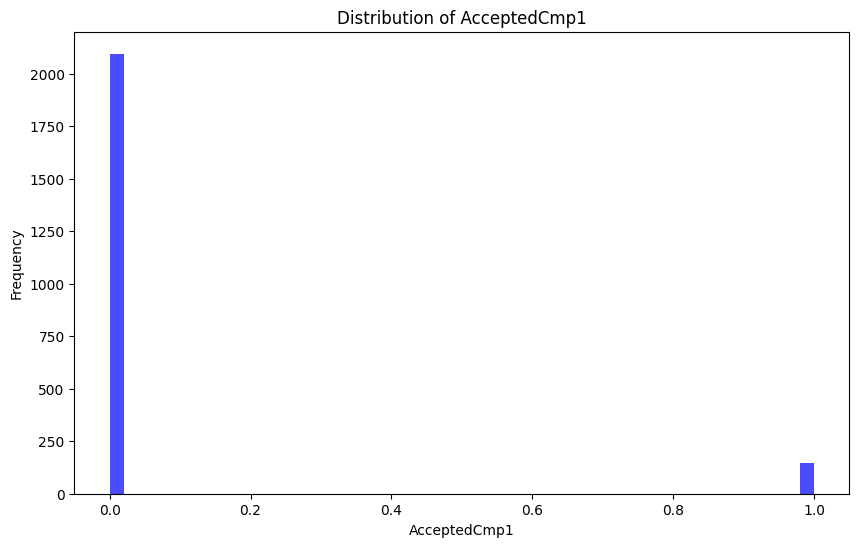

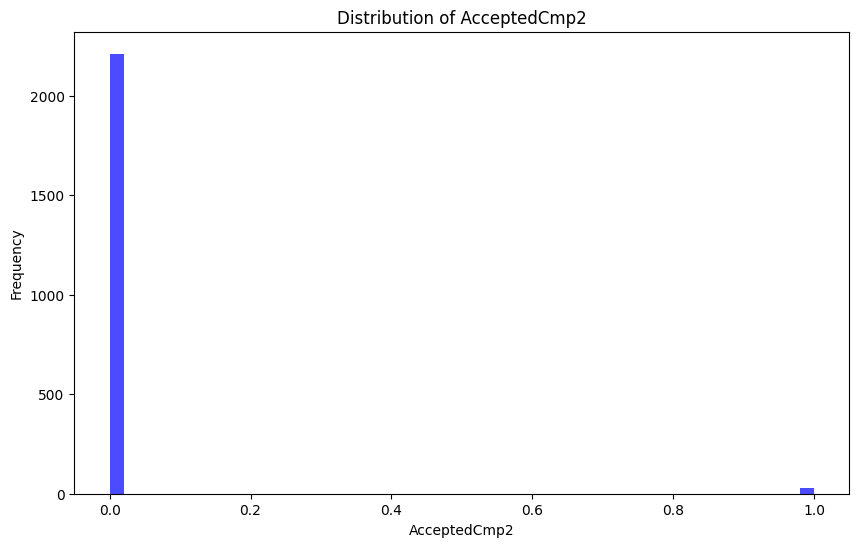

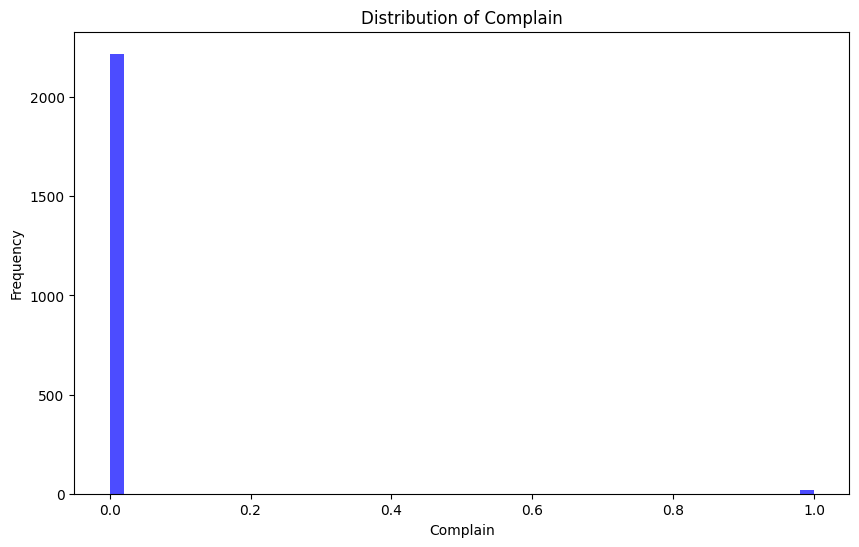

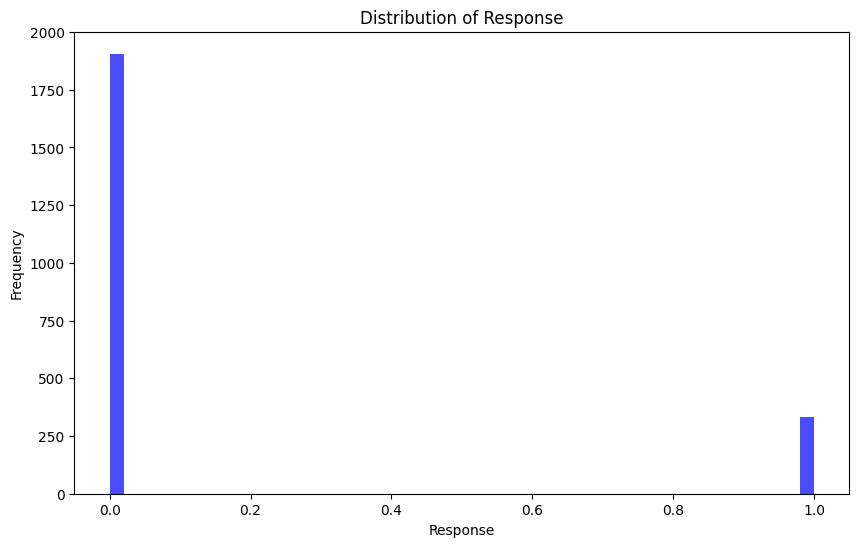

In [53]:
for column in num_col:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=50, color='blue', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

**Observations :**
  - we have some left and right skweed data distibution.
  - due to most of customers are adults and thats obvious.
  - And most of customers having average salary as shown in above fig.

**ScatterPlot :**

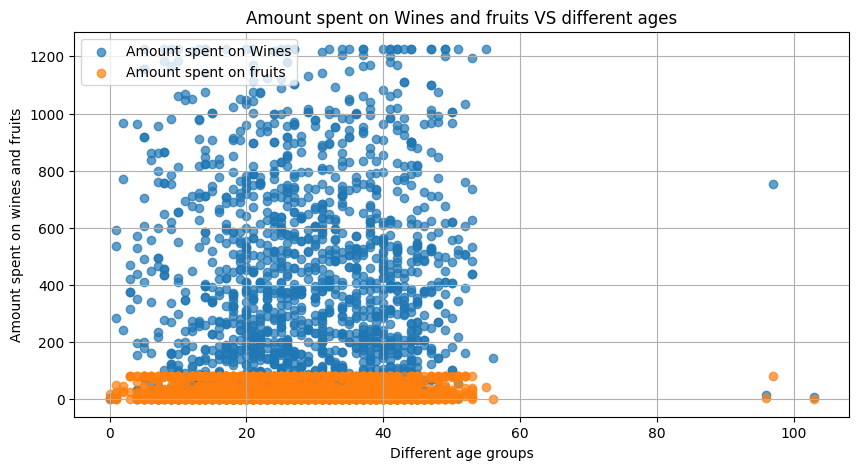

In [56]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Age'], df['MntWines'],  label='Amount spent on Wines', alpha=0.7)
plt.scatter(df['Age'], df['MntFruits'],  label='Amount spent on fruits', alpha=0.7)
plt.title('Amount spent on Wines and fruits VS different ages')
plt.xlabel('Different age groups')
plt.ylabel('Amount spent on wines and fruits')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

**Observations :**
  - In the above plot most of customer are between `1940` to `1998`.
  - And they are buying more wines than fruits.
  - So we can recomend them wines.

In [58]:
df.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age_group'],
      dtype='object')

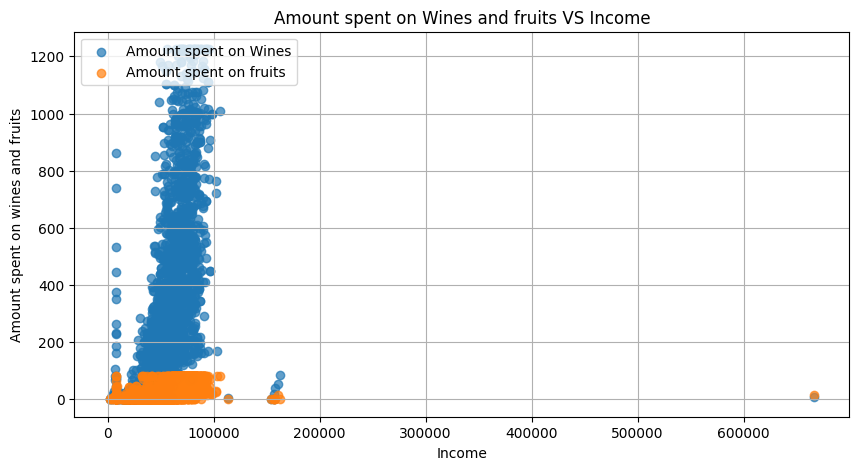

In [59]:
## Amount spent on wines and fruits VS Income :
plt.figure(figsize=(10, 5))
plt.scatter(df['Income'], df['MntWines'],  label='Amount spent on Wines', alpha=0.7)
plt.scatter(df['Income'], df['MntFruits'],  label='Amount spent on fruits', alpha=0.7)
plt.title('Amount spent on Wines and fruits VS Income')
plt.xlabel('Income')
plt.ylabel('Amount spent on wines and fruits')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

**Observations :**
  - Most of the customer(below `100000`) spent there money on wines.
  - And minimum amount spent on fruits.

**Bar Chart :**

C:\Users\mpapu\AppData\Local\Temp\ipykernel_4356\2454422424.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Age_group'], palette="coolwarm")


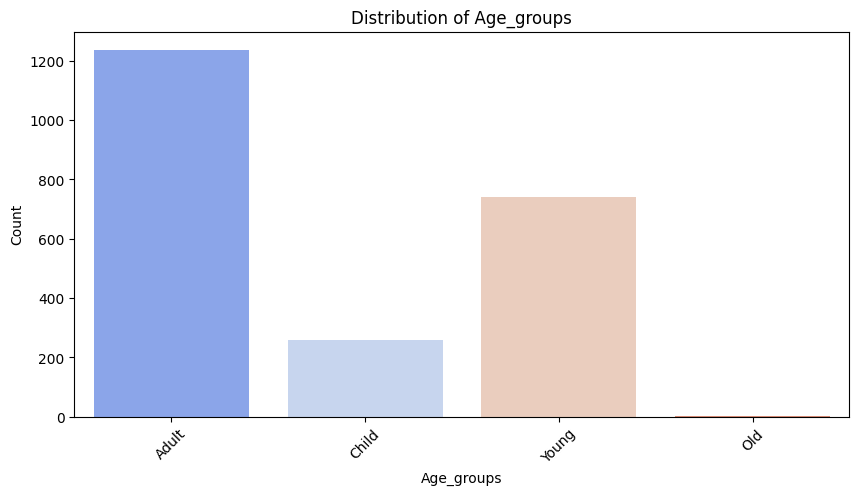

In [62]:
# Bar chart for 'Education'
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Age_group'], palette="coolwarm")
plt.title("Distribution of Age_groups")
plt.xlabel("Age_groups")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Observations :**
  - we have more than half (1200+) of customers (highest) are comes under `Adult` group and small of customers are in `Old` age group.

C:\Users\mpapu\AppData\Local\Temp\ipykernel_4356\4061626655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Education'], palette="coolwarm")


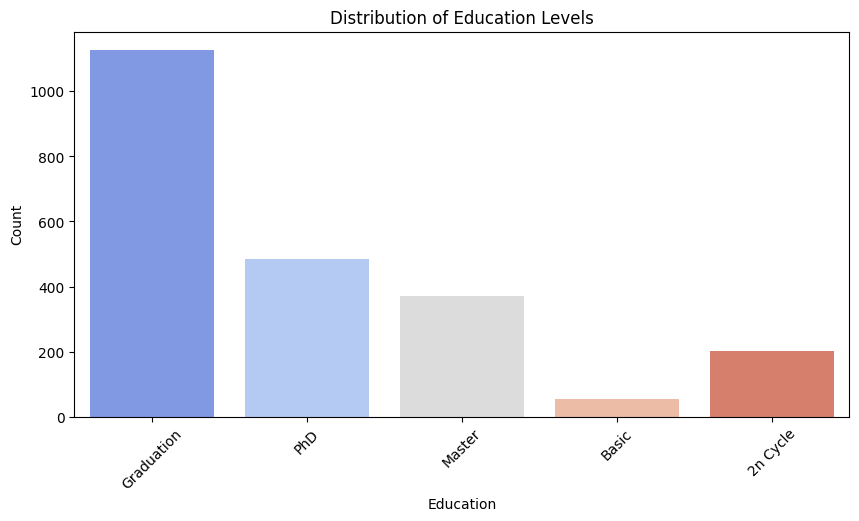

In [64]:
# Bar chart for 'Education'
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Education'], palette="coolwarm")
plt.title("Distribution of Education Levels")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Observation :**
  - Most of customer(1000+) are Graduated.

C:\Users\mpapu\AppData\Local\Temp\ipykernel_4356\1476579070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Marital_Status'], palette="coolwarm")


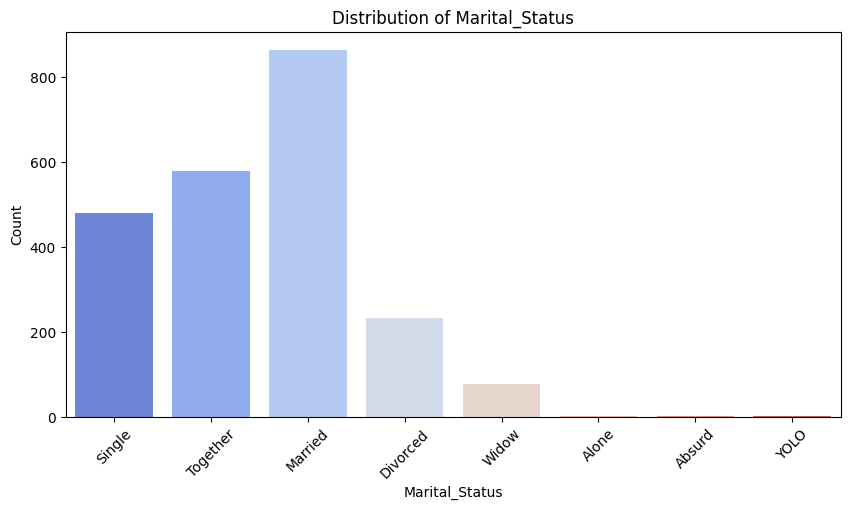

In [66]:
# Bar chart for 'Marital_Status'
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Marital_Status'], palette="coolwarm")
plt.title("Distribution of Marital_Status")
plt.xlabel("Marital_Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Observations :**
  - we have more than 800 customer (highest) is `married` and lowest of customers are Alone, Absurd and YOLO(You Only Live Once).

# Feature Engineering:

In [69]:
cat_col

['Education', 'Marital_Status', 'Age_group']

In [70]:
##Converting categorical column into numerical for beter model train:
od_enc = OrdinalEncoder()

In [71]:
arr = od_enc.fit_transform(df[cat_col])
arr

array([[2., 4., 0.],
       [2., 4., 0.],
       [2., 5., 0.],
       ...,
       [2., 2., 3.],
       [3., 5., 0.],
       [4., 3., 0.]], shape=(2240, 3))

In [72]:
df[cat_col] = arr

In [73]:
df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_group
0,39,2.0,4.0,58138.0,0,0,58,635,81,546,...,4,7,0,0,0,0,0,0,1,0.0
1,42,2.0,4.0,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,0.0
2,31,2.0,5.0,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,0.0
3,12,2.0,5.0,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,0,1.0
4,15,4.0,3.0,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,0,3.0


In [74]:
## Verifying all categorical column converted into numerical column:
df.dtypes

Age                      int64
Education              float64
Marital_Status         float64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts        float64
MntSweetProducts         int64
MntGoldProds           float64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age_group              float64
dtype: object

## Showing minimum and maximum values if scaling necessary or not:

In [76]:
df2 = pd.DataFrame({
    'Minimum': df.min(),
    'Maximum': df.max()
})
print(df2)

                     Minimum   Maximum
Age                      0.0     103.0
Education                0.0       4.0
Marital_Status           0.0       7.0
Income                1730.0  666666.0
Kidhome                  0.0       2.0
Teenhome                 0.0       2.0
Recency                  0.0      99.0
MntWines                 0.0    1225.0
MntFruits                0.0      81.0
MntMeatProducts          0.0     556.0
MntFishProducts          0.0     120.5
MntSweetProducts         0.0      81.0
MntGoldProds             0.0     126.5
NumDealsPurchases        0.0       6.0
NumWebPurchases          0.0      27.0
NumCatalogPurchases      0.0      10.0
NumStorePurchases        0.0      13.0
NumWebVisitsMonth        0.0      20.0
AcceptedCmp3             0.0       1.0
AcceptedCmp4             0.0       1.0
AcceptedCmp5             0.0       1.0
AcceptedCmp1             0.0       1.0
AcceptedCmp2             0.0       1.0
Complain                 0.0       1.0
Response                 

**Observations :**
  - Some of columns having huge value.
  - i.e :- 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', ''MntFishProducts', 'MntSweetProducts', 'MntGoldProds.
  - those columns needs to scalling.,

## StandardScaler:

In [79]:
## Standardscaler
ss = StandardScaler()

**Why?**

 - Improves Model Performance.
 - large values can dominate the model's learning process.
 - some algorithm converge faster when data is standardized.

**Transforming data**

In [82]:
arr = ss.fit_transform(df[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
arr

array([[ 0.25027631,  0.30703926,  1.00575135, ...,  2.19030316,
         2.14504445,  1.21528019],
       [-0.21309477, -0.38366418, -0.87953928, ..., -0.74631974,
        -0.76043454, -0.83890037],
       [ 0.77969173, -0.79808624,  0.37429984, ...,  1.95487769,
        -0.0340648 ,  0.062935  ],
       ...,
       [ 0.20481927,  1.44669994,  1.830566  , ..., -0.00287091,
        -0.36093118, -0.38798268],
       [ 0.68665606, -1.41971934,  0.38034244, ...,  1.18664723,
         0.29280159,  0.53890367],
       [ 0.04326408, -0.31459383, -0.65898445, ..., -0.74631974,
        -0.76043454, -0.46313563]], shape=(2240, 8))

In [83]:
df[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']] = arr

In [84]:
df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_group
0,39,2.0,4.0,0.250276,0,0,0.307039,1.005751,2.176816,2.210169,...,4,7,0,0,0,0,0,0,1,0.0
1,42,2.0,4.0,-0.213095,1,1,-0.383664,-0.879539,-0.758828,-0.810358,...,2,5,0,0,0,0,0,0,0,0.0
2,31,2.0,5.0,0.779692,0,0,-0.798086,0.374300,1.002558,-0.133536,...,10,4,0,0,0,0,0,0,0,0.0
3,12,2.0,5.0,-0.987004,1,0,-0.798086,-0.879539,-0.648741,-0.732048,...,4,6,0,0,0,0,0,0,0,1.0
4,15,4.0,3.0,0.256366,1,0,1.550305,-0.390089,0.782385,-0.183879,...,6,5,0,0,0,0,0,0,0,3.0


## Heatmap(corelation):

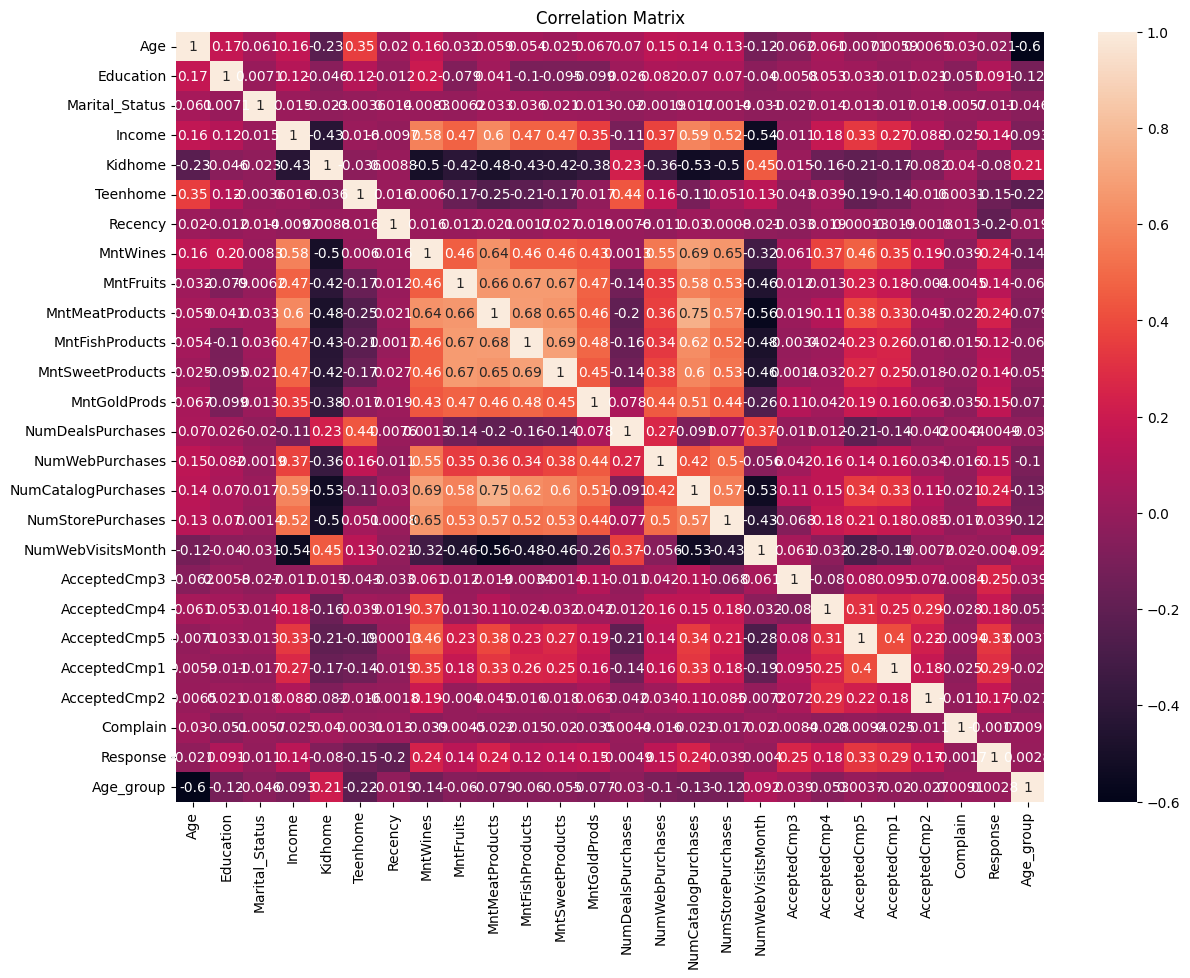

In [86]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

**Identifying corelated columns(threshold =0.7)**

In [88]:
def high_correlation_columns(df, threshold):

    # Identifies pairs of columns with correlation greater than the given threshold.
    # Returns:
    # List of tuples: Each tuple contains two column names and their correlation value.

    corr_matrix = df.corr()  # Compute correlation matrix
    correlated_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):  # Avoid duplicate pairs
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > threshold:  # Check threshold
                correlated_pairs.append((corr_matrix.index[i], corr_matrix.columns[j], round(corr_value, 3)))
    return correlated_pairs

# Get highly correlated columns with a threshold of 0.7
threshold = 0.7
correlated_cols = high_correlation_columns(df, threshold)

In [89]:
# Print results
for col1, col2, corr in correlated_cols:
    print(f"Columns {col1} and {col2} have a correlation of {corr}")

Columns MntMeatProducts and NumCatalogPurchases have a correlation of 0.75


**Observation :**
  - Columns `MntMeatProducts` and `NumCatalogPurchases` have a highest correlation of 0.75.
  - Columns `AcceptedCmp5` and `Complain` have a Lowest correlation of -0.009.

## Final Dataset :

In [92]:
df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_group
0,39,2.0,4.0,0.250276,0,0,0.307039,1.005751,2.176816,2.210169,...,4,7,0,0,0,0,0,0,1,0.0
1,42,2.0,4.0,-0.213095,1,1,-0.383664,-0.879539,-0.758828,-0.810358,...,2,5,0,0,0,0,0,0,0,0.0
2,31,2.0,5.0,0.779692,0,0,-0.798086,0.374300,1.002558,-0.133536,...,10,4,0,0,0,0,0,0,0,0.0
3,12,2.0,5.0,-0.987004,1,0,-0.798086,-0.879539,-0.648741,-0.732048,...,4,6,0,0,0,0,0,0,0,1.0
4,15,4.0,3.0,0.256366,1,0,1.550305,-0.390089,0.782385,-0.183879,...,6,5,0,0,0,0,0,0,0,3.0


# Model Building:

In [94]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)

In [95]:
# Function to plot clusters:
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='Set2')
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()
    plt.show()

## 1. K-Means Clustering:

## Elbow method

In [98]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

In [99]:
inertia

[427504.6906250003,
 203772.7780291863,
 155122.28304744928,
 135155.74247338178,
 125885.13496577922,
 113867.63734762938,
 102535.63018409407,
 94419.50676316916,
 89304.45525033167,
 88295.64550587797]

In [100]:
clusters = range(1, 11)

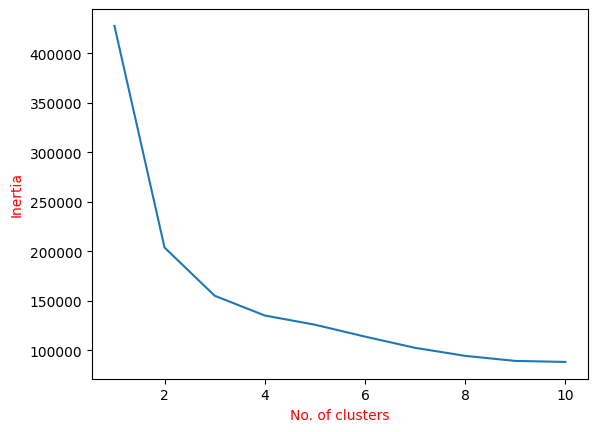

In [101]:
plt.plot(clusters, inertia)
plt.xlabel('No. of clusters', color='r')
plt.ylabel('Inertia',color='r')
plt.show()

**Observation:**
  - There is no decrease change after 4.
  - So we chose number of cluster is 4.

In [103]:
## Model building:
kmeans = KMeans(n_clusters=4)
cluster = kmeans.fit(df)

In [104]:
kmeans_labels = cluster.labels_

In [105]:
np.unique(kmeans_labels)

array([0, 1, 2, 3], dtype=int32)

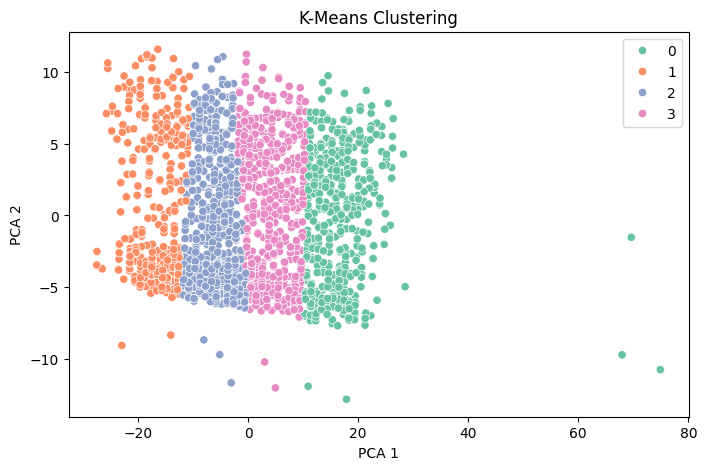

In [106]:
plot_clusters(pca_data, kmeans_labels, "K-Means Clustering")

## Score checking:

In [108]:
kmeans_score = round(silhouette_score(df, kmeans_labels)*100, 2)
print(kmeans_score)

24.77


## 2. Hierarchical Clustering(Agglomerative)

## Visualization of dendrogram :

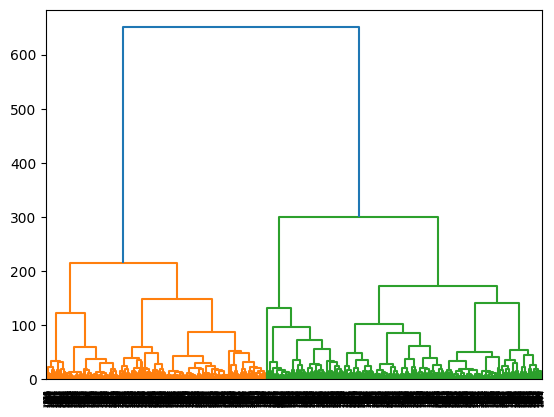

In [111]:
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))

**Observation:**
  - There is two cuts at 1st.
  - So we chose number of cluster is 2.

In [113]:
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')

In [114]:
clusters = agg.fit(df)

In [115]:
hierar_labels = clusters.labels_

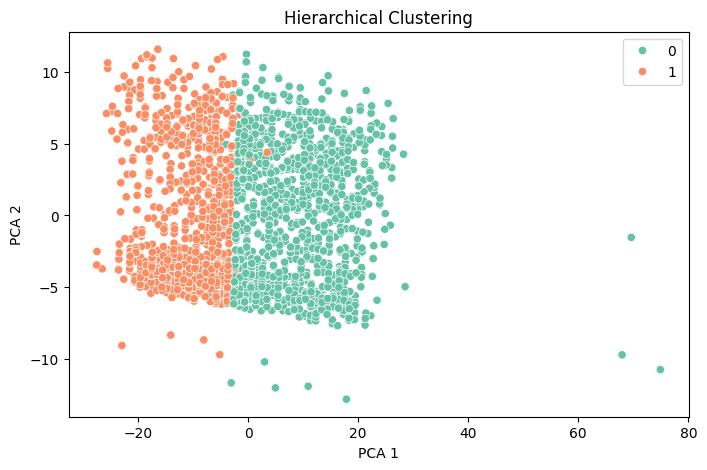

In [116]:
plot_clusters(pca_data, hierar_labels, "Hierarchical Clustering")

## Score checking:

In [118]:
hierar_score = round(silhouette_score(df, hierar_labels)*100, 2)
print(hierar_score)

39.19


## 3. DBSCAN

**Optimization of parameters:**

In [121]:
ep = [0.5, 0.6, 0.7, 0.8, 0.9]
min_sm = [1, 2, 3]

In [122]:
output = []
for i in ep:
    for j in min_sm:
        model = DBSCAN(eps=i, min_samples=j)
        dbsc = model.fit(df)
        label = dbsc.labels_
        score = silhouette_score(df, label)
        output.append([i, j, score])

In [123]:
output

[[0.5, 1, np.float64(0.15982142857142856)],
 [0.5, 2, np.float64(-0.45814184978985933)],
 [0.5, 3, np.float64(-0.48419847307155095)],
 [0.6, 1, np.float64(0.15982142857142856)],
 [0.6, 2, np.float64(-0.45814184978985933)],
 [0.6, 3, np.float64(-0.48419847307155095)],
 [0.7, 1, np.float64(0.15999993726230455)],
 [0.7, 2, np.float64(-0.457449311861602)],
 [0.7, 3, np.float64(-0.4849756630445506)],
 [0.8, 1, np.float64(0.15999993726230455)],
 [0.8, 2, np.float64(-0.457449311861602)],
 [0.8, 3, np.float64(-0.4849756630445506)],
 [0.9, 1, np.float64(0.1604560380469196)],
 [0.9, 2, np.float64(-0.456392070200045)],
 [0.9, 3, np.float64(-0.4849756630445506)]]

In [124]:
## displaying highest score:
a = pd.DataFrame(output)
score_1 = a.iloc[:, 2].max()

In [125]:
score_1

np.float64(0.1604560380469196)

In [126]:
a[a[2] == score_1]

,0,1,2
12,0.9,1,0.160456


**Observation:**
  - Parameters EPS and min_sample are `0.9` and `1` having highest score.

In [128]:
## Model building:
dbscan = DBSCAN(eps=0.9, min_samples=1)
dbscan_labels = dbscan.fit(df).labels_

In [129]:
np.unique(dbscan_labels)

array([   0,    1,    2, ..., 2053, 2054, 2055], shape=(2056,))

In [130]:
dbscan_score = round(silhouette_score(df, dbscan_labels)*100, 2)
print(dbscan_score)

16.05


**Observation:**
  - It has lowest score and it grouping data into so many clusters like indivisualy.
  - so we can not visualize the clusters.

# Making a data frame to show all the score.

In [133]:
data = {
    'Clusters':['K_means', 'Hierarchical', 'DBSCAN'],
    'Scores':[kmeans_score, hierar_score, dbscan_score]
}

In [134]:
score_df = pd.DataFrame(data)

In [135]:
score_df

,Clusters,Scores
0,K_means,24.77
1,Hierarchical,39.19
2,DBSCAN,16.05


**Visualizing score:**

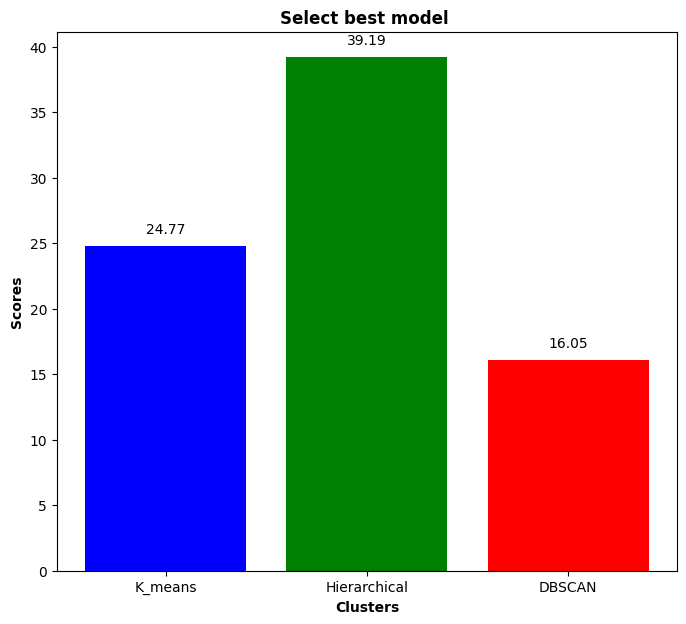

In [137]:
plt.figure(figsize=(8, 7))
plt.bar(score_df['Clusters'], score_df['Scores'], color=['blue', 'green', 'red'])
# Add values on top of bars
for i, v in enumerate(score_df['Scores']):
    plt.text(i, v + 1, f"{v:.2f}", ha='center')

plt.title('Select best model ', fontdict={'fontweight':'bold'})
plt.xlabel('Clusters', fontdict={'fontweight':'bold'})
plt.ylabel('Scores', fontdict={'fontweight':'bold'})
plt.show()

**Observations :**
  - Hierarchical cluster having highest score.
  - i.e `39.19`.
  - Hierarchical clustering (specifically Agglomerative Clustering) builds nested clusters by progressively merging or splitting them.

# Creating a target column that contains clusters:

In [140]:
df['clusters'] = hierar_labels

In [141]:
df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_group,clusters
0,39,2.0,4.0,0.250276,0,0,0.307039,1.005751,2.176816,2.210169,...,7,0,0,0,0,0,0,1,0.0,0
1,42,2.0,4.0,-0.213095,1,1,-0.383664,-0.879539,-0.758828,-0.810358,...,5,0,0,0,0,0,0,0,0.0,0
2,31,2.0,5.0,0.779692,0,0,-0.798086,0.374300,1.002558,-0.133536,...,4,0,0,0,0,0,0,0,0.0,0
3,12,2.0,5.0,-0.987004,1,0,-0.798086,-0.879539,-0.648741,-0.732048,...,6,0,0,0,0,0,0,0,1.0,1
4,15,4.0,3.0,0.256366,1,0,1.550305,-0.390089,0.782385,-0.183879,...,5,0,0,0,0,0,0,0,3.0,1


## Separating feature and target columns:

In [143]:
feature = df.drop(columns='clusters')
target = df['clusters']

## Build a model for the deployment process:

In [145]:
lr = LogisticRegression()
lr.fit(feature, target)

C:\Users\mpapu\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Exporting models for deployment:

In [147]:
scaler = 'scaler.pkl'
encorder = 'encorder.pkl'
file_lr = 'model_lr.pkl'

pickle.dump(ss, open(scaler,'wb'))
pickle.dump(od_enc, open(encorder,'wb'))
pickle.dump(lr, open(file_lr,'wb'))